# Data Exploration

En esta sección haremos una exploración superficial de los datos recogidos en el dataset que se ha procesado previamente, para poder visualizar la distribución de los datos y detectar anomalías, como datos faltantes o extraños, rapidemente.

Se importa el dataframe pulido del trabajo

In [4]:
import pandas as pd 
import numpy as np 
import os
import sys

In [5]:
root_project = os.path.dirname(os.getcwd())
sys.path.append(root_project)
movies_df_pkl_dir = root_project + '/resources/movies_df.pkl'
movies_pkl_df = pd.read_pickle(movies_df_pkl_dir)
movies_df = movies_pkl_df.copy()

In [48]:
movies_df.head()

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count
0,Toy Story,1995-10-30,en,"[Animation, Comedy, Family]",30000000,373554033.0,[United States of America],81.0,7.7,5415.0
1,Jumanji,1995-12-15,en,"[Adventure, Fantasy, Family]",65000000,262797249.0,[United States of America],104.0,6.9,2413.0
2,Grumpier Old Men,1995-12-22,en,"[Romance, Comedy]",0,0.0,[United States of America],101.0,6.5,92.0
3,Waiting to Exhale,1995-12-22,en,"[Comedy, Drama, Romance]",16000000,81452156.0,[United States of America],127.0,6.1,34.0
4,Father of the Bride Part II,1995-02-10,en,[Comedy],0,76578911.0,[United States of America],106.0,5.7,173.0


In [34]:
movies_df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,4.546300e+04,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000


Empezamos por comprobar si los nombres de las películas son todos únicos o si se repite algún valor

In [18]:
len(movies_df) - movies_df.title.nunique()

3186

In [26]:
movies_df.title.nunique()

42277

In [7]:
movies_df.title[movies_df.title.duplicated(False)]

5                         Heat
6                      Sabrina
16       Sense and Sensibility
25                     Othello
27                  Persuasion
                 ...          
45418               Pickpocket
45450                      Mom
45451        The Morning After
45457               Robin Hood
45460                 Betrayal
Name: title, Length: 5516, dtype: object

Se visualizarán los datos de cada columna con gráficos acordes al tipo de información que guardan. Iremos columna a columna:

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### -release_date

In [25]:
import datetime

In [14]:
released_movies_Y = movies_df['release_date'].groupby(movies_df.release_date.dt.to_period("M")).agg('count')

In [16]:
released_movies_Y

release_date
1874-12    1
1878-06    1
1883-11    1
1887-08    1
1888-01    1
          ..
2018-03    1
2018-04    2
2018-11    1
2018-12    1
2020-12    1
Freq: M, Name: release_date, Length: 1350, dtype: int64

In [15]:
movies_df['release_date'].groupby(movies_df.release_date.dt.to_period("M")).agg('count').sort_values(ascending=False)

release_date
2011-09    247
2014-10    245
2008-01    242
2014-09    241
2012-09    238
          ... 
1911-01      1
1910-11      1
1910-09      1
1910-06      1
1874-12      1
Freq: M, Name: release_date, Length: 1350, dtype: int64

In [31]:
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12)]

In [32]:
x[0]

datetime.datetime(2021, 1, 8, 19, 8, 15, 885579)

In [80]:
import datetime

In [81]:
x_axes = datetime.strptime(x_axes)
y_axes = released_movies_Y.values

AttributeError: module 'datetime' has no attribute 'strptime'

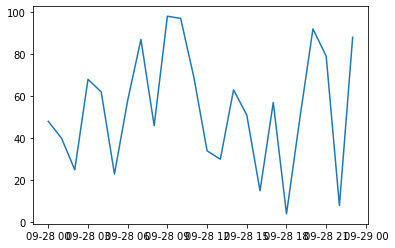

In [68]:
x = np.array([datetime.datetime(2013, 9, 28, i, 0) for i in range(24)])
y = np.random.randint(100, size=x.shape)

plt.plot(x,y)
plt.show()

In [72]:
fig_7 = plt.figure(figsize=(8,5),dpi=100)
axes_7 = fig_7.add_axes([0.1,0.1,0.9,0.9])
plt.plot(x_axes, y_axes)

ValueError: x and y must have same first dimension, but have shapes (1,) and (1350,)

<AxesSubplot:xlabel='release_date'>

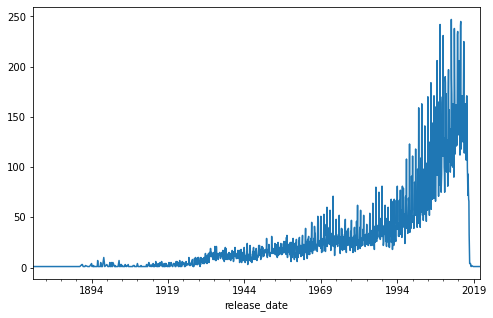

In [48]:
plt.figure(figsize=(8,5))
released_movies_Y.plot()

In [29]:
dates = matplotlib.dates.date2num(released_movies_Y)

### -original_language

In [ ]:
movies_df

In [ ]:
#%matplotlib inline

In [94]:
lan_cunt = movies_df.groupby('original_language').original_language.count().sort_values(ascending=False)
lan_cunt.head(6)

original_language
en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
Name: original_language, dtype: int64

In [106]:
lan_num[1]

4966

In [114]:
lan_num

[32269, 2438, 1529, 1350, 1080, 994, 826, 4966]

In [115]:
lan

[Index(['en', 'fr', 'it', 'ja', 'de', 'es', 'ru'], dtype='object', name='original_language'),
 'otros']

([<matplotlib.patches.Wedge at 0x11e8a05d9a0>,
 [Text(-0.674082463790753, 0.8692599335122886, 'en'),
  Text(-0.09128378550818689, -1.0962058522482425, 'fr'),
  Text(0.20894790523436887, -1.0799725796973594, 'it'),
  Text(0.4183163735753244, -1.017355105948159, 'ja'),
  Text(0.5825014624642497, -0.9331088072818788, 'de'),
  Text(0.709832431814753, -0.8403201287271145, 'es'),
  Text(0.8096540581298822, -0.7446209143945753, 'ru'),
  Text(1.0358345232818915, -0.3701983797606046, 'otros')],
 [Text(-0.36768134388586526, 0.4741417819157937, '71%'),
  Text(-0.0497911557317383, -0.5979304648626776, '5%'),
  Text(0.1139715846732921, -0.589075952562196, '3%'),
  Text(0.2281725674047224, -0.5549209668808139, '3%'),
  Text(0.3177280704350453, -0.5089684403355702, '2%'),
  Text(0.38718132644441067, -0.4583564338511533, '2%'),
  Text(0.44162948625266296, -0.406156862397041, '2%'),
  Text(0.5650006490628499, -0.20192638896032974, '11%')])

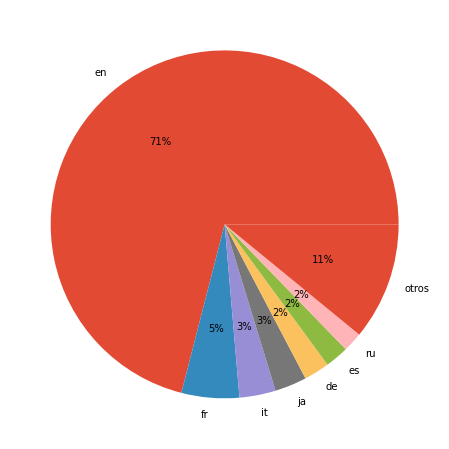

In [120]:
plt.figure(figsize=(8,8))

plt.style.use('ggplot')

rest = lan_cunt.values[7:].sum()
lan_num = list(lan_cunt.values[:7]) + [rest]
lan = list(lan_cunt.index[:7]) + ['otros']


plt.pie(lan_num, labels=lan, autopct='%1.0f%%')

In [ ]:
plt.close 